# ANALYSIS OF SPAIN DEMOGRAPHIC DATA - PART I

## Introduction

This work aims to analyze, via python, the demographic data of __INE - Instituto Nacional de Estadística de España__.



Let's use some libraries like:

- __Beautiful Soup__: is a library (version 4.9.3) that facilitates the extraction (scrap) of information from web pages.
- __html5lib__: is a pure python library (version 1.1) for parsing HTML. It is designed to conform to the WHATWG HTML specification (__W__eb __H__ypertext __A__pplication __T__echnology __W__orking __G__roup), as implemented by all major web browsers.
- __Requests__: is a simple HTTP library (version 2.24.0) that allows you to send HTTP/1.1 requests with some ease. There is no need to manually add Query Strings to your URLs or encode PUT & POST data. Nowadays, just use the json method.

Let's then install and import these libraries. If installed, the message: "Requirement already satisfied" will appear. Let's check their versions.

In [82]:
!pip install beautifulsoup4
!pip install requests
!pip install html5lib


In [83]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [84]:
pip show beautifulsoup4

Name: beautifulsoup4
Version: 4.9.3
Summary: Screen-scraping library
Home-page: http://www.crummy.com/software/BeautifulSoup/bs4/
Author: Leonard Richardson
Author-email: leonardr@segfault.org
License: MIT
Location: c:\users\usuario\anaconda3\lib\site-packages
Requires: soupsieve
Required-by: conda-build
Note: you may need to restart the kernel to use updated packages.


In [85]:
pip show html5lib

Name: html5lib
Version: 1.1
Summary: HTML parser based on the WHATWG HTML specification
Home-page: https://github.com/html5lib/html5lib-python
Author: None
Author-email: None
License: MIT License
Location: c:\users\usuario\anaconda3\lib\site-packages
Requires: webencodings, six
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip show requests

Name: requests
Version: 2.24.0
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: c:\users\usuario\anaconda3\lib\site-packages
Requires: certifi, idna, urllib3, chardet
Required-by: torchvision, Sphinx, nba-api, jupyterlab-server, jupyter-dash, folium, conda, conda-build, anaconda-project, anaconda-client
Note: you may need to restart the kernel to use updated packages.


## Task 1:

Let's do "web scrapping" on a www.ine.es page. This page will refer to "__Relación de Comunidades y Ciudades Autónomas con sus Códigos__", and which is in HTML, as you can see in the figure below where you can see an extract of the table in HTML, with two columns: __Código__ and __Literal__:
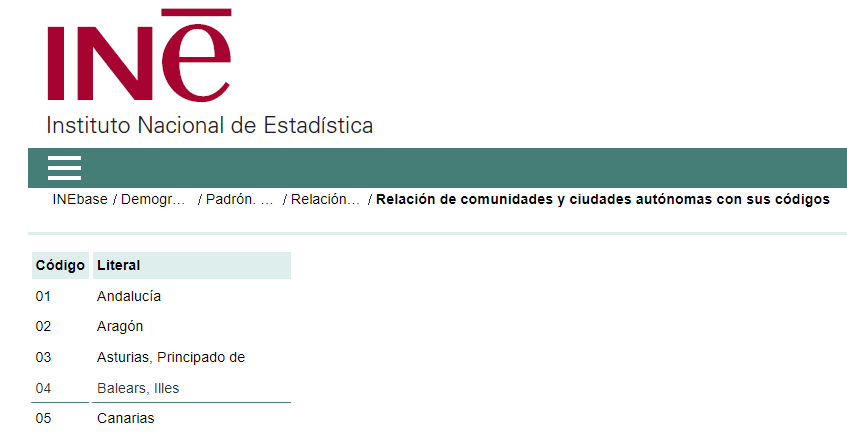
This table presents itself as the first political division of the country Spain. Thus, from these codes it is possible to have a "TopDown" view of the Spanish demography.

The page is: 

                    www.ine.es/daco/daco42/codmun/cod_ccaa.htm,
                    
and the first action is to create a variable with the page URL:

In [87]:
url_estatica = "https://www.ine.es/daco/daco42/codmun/cod_ccaa.htm"
url_estatica

'https://www.ine.es/daco/daco42/codmun/cod_ccaa.htm'

Let's execute a __HTTP GET__ method to request the HTML page designated in the <code>static_url</code> variable as an HTTP response (response). The __200__ response signals 'Success - OK', that is, the Request was received, understood and accepted with success. Note that two ways of exposing the status code were used, but that there is still a specific method <code>status_code</code> that explains the answer, clear and crystal clear.

In [88]:
resposta_scrap = requests.get(url_estatica)
print(resposta_scrap)
print(resposta_scrap.status_code)

<Response [200]>
200


Let's create a BeautifulSoup object (__soup__) from response or HTML response and then we'll print the page title to check if the BeautifulSoup object (__soup__) was created correctly:

In [89]:
# estamos usando o html5lib como o parser
soup = BeautifulSoup(resposta_scrap.content,'html5lib' )
soup.title

<title>INEbase/ Clasificaciones /Relación de municipios, provincias, comunidades y ciudades autónomas con sus códigos / Relación de comunidades y ciudades autónomas con sus códigos</title>

Let's now extract all column/variable names from the HTML table header. For that, let's try to find all tables on the page first.

The __find_all()__ method examines a tag's descendants and retrieves all that match your filters.

A __descendant__ refers to whatever element is connected, however farther down the document tree - no matter how many levels down. In the diagram below, taken from the Simmons University website, all elements that are connected below the $<div>$ element are descendants of this $<div>$. The following figure summarizes this:
 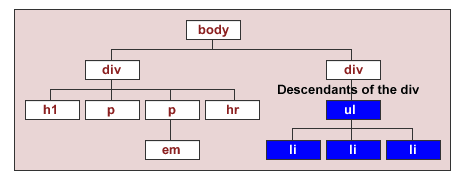 
 
    

In [90]:
html_tables = soup.find_all('table')
len(html_tables)

1

Note that there is only one table, because the presentation of <code>html_tables</code> is in the form of lists and thus its length (len) is only 1 (__just one__) list. It is worth noting that the tags contained in the table have the following meaning:
- $<th></th>$ specifies a table heading, more specifically the column name.
- $<tr></tr>$ specifies a table row.
- $<td></td>$ specifies a table cell, or, in other words, a value referring to the crossing row X column.
- $<tbody></tbody>$ specifies a table body, that is, the table with its values itself.
- $<table></table>$ specifies a table

Let's check the table's content, still in HTML with <code>html_tables[0]</code>, assign the table content to the <code>first_table</code> variable and then check the column names, through commands python:

In [91]:
html_tables[0]

<table class="miTabla" summary="Tabla códigos">
  <tbody><tr class="diezcarne">

    <th align="left">Código</th> 
    <th align="left">Literal</th>
    </tr>
  <tr valign="bottom">
    <td>01 </td>
    <td>Andalucía</td>
    </tr>
<tr valign="bottom">
  <td>02 </td>
    <td>Aragón</td>
    </tr>
<tr valign="bottom">
  <td>03 </td>
    <td>Asturias, Principado de</td>
    </tr>
<tr valign="bottom">
  <td>04 </td>
    <td>Balears, Illes</td>
    </tr>
<tr valign="bottom">
  <td>05 </td>
    <td>Canarias</td>
    </tr>
<tr valign="bottom">
  <td>06 </td>
    <td>Cantabria</td>
    </tr>
<tr valign="bottom">
  <td>07 </td>
    <td>Castilla y León</td>
    </tr>
<tr valign="bottom">
  <td>08 </td>
    <td>Castilla - La Mancha</td>
    </tr>
<tr valign="bottom">
  <td>09 </td>
    <td>Cataluña</td>
    </tr>
<tr valign="bottom">
  <td>10 </td>
    <td>Comunitat Valenciana</td>
    </tr>
<tr valign="bottom">
  <td>11 </td>
    <td>Extremadura</td>
    </tr>
<tr valign="bottom">
  <td>12 </td

In [92]:

primeira_tabela=html_tables[0]

Let's check the table class. The __class__ attribute assigns one or more class names to the $<table>$ tag. Class names are defined in a __stylesheet__ or a local $<style>$ element. Classes, that is, class names, are used to style elements. A __stylesheet__ is a file that tells the browser how to render a page. This topic deserves to be discussed in HTML learning.


In [93]:
print('Classe de cada tabela:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classe de cada tabela:
['miTabla']


In the code presented below and which aims to remove the names of the columns from the table inserted in __primera_tabela__ we will use:


- The __find_all()__ method that will examine the descendants of a $th$ tag and retrieve all that match your filters.
- The __get_text()__ method, to get only the text part of a document or tag. It returns all text in a document or below a tag, as a single Unicode string.
- The __rstrip()__ method returns a copy of the string in which all characters have been removed from the (right) end of the string (white space characters by default). In parentheses you can define other characters to be suppressed.

To better understand these methods, let's run them separately so that the purpose of each method is clear. Firstly, __html_tables__ contains the HTML file, which is quite extensive, as you can see in the cell commands above. Second, let's run the
__column = first_table.find_all("th")__ and print the result:

In [94]:
column = primeira_tabela.find_all("th")
print(column)
print(len(column))

[<th align="left">Código</th>, <th align="left">Literal</th>]
2



It is observed that the result of the above command:



It is a list with two th elements, that is, with two column names.
In sequence, when executing the following commands indicating a value between square brackets, we seek to individualize the elements of the list that are two, as shown by __len()__. We ran it 3 times, where [0] and [1] present the column names, and [2] already gives __error__ because the third element doesn't exist.

In [95]:
column0 = primeira_tabela.find_all("th")[0]
column0

<th align="left">Código</th>

In [96]:
column1 = primeira_tabela.find_all("th")[1]
column1

<th align="left">Literal</th>

In [97]:
column2 = primeira_tabela.find_all("th")[2]
column2

IndexError: list index out of range

The error is verified and that a division of the list was made and that resulted in:

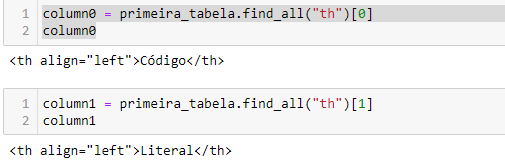

Where you can see the two "th" tags highlighting the column names, but which are still surrounded by HTML elements. The next step is to get the text without the tags. And for that we will use the __get_text()__ method, as follows::

In [ ]:
column00 = primeira_tabela.find_all("th")[0].get_text()
column00

In [ ]:
column11 = primeira_tabela.find_all("th")[1].get_text()
column11

It is verified that the __get_text()__ method separates the names associated in the 'th' tags:
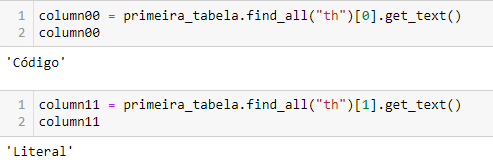

They're separated now. So what is __rstrip()__ for?. It would work if these column names were as shown below, that is, with characters to the right of the string that were unwanted:


In [ ]:
a = 'Codigo><!*&& '
b = 'Literal< ##$* '
print(a,b)

In [ ]:
aa=a.rstrip('*>&<! ')
bb=b.rstrip('*#$<! ')
print(aa,bb)

The objective will now be to create a Pandas Dataframe by analyzing (parsing) the HTML table, whose data is in a URL designated in **url_statica**.
Let's use a Pandas solution which is **read.html()** and whose result is a **dfs1** list with one element. Thus, to access as a dataframe, just access **dfs1[0]**, assigning to another variable **df1**, which will be a **Dataframe**.

I recommend accessing the website:

        https://towardsdatascience.com/a-guide-to-scraping-html-tables-with-pandas-and-beautifulsoup-7fc24c331cf7, 
        
which is very explanatory in the use of this solution:

In [ ]:
pagina = requests.get(url_estatica)
soup = BeautifulSoup(pagina.text, 'html5lib')

dfs1 = pd.read_html(pagina.text)
df1 = dfs1[0]
df1.head()

In [ ]:
df1.info()

In [ ]:
df1.to_csv('ine0.csv', index=False)

## Task 2:

Define the INE files to be downloaded to provide a statistical analysis on the demography of Spain. For the purpose of transferring these files, make one with Panda resources (xls, for example) and another via json.
To understand better, it is worth explaining the following, which is in Spanish:

*Artículo 137. Municipios, provincias y Comunidades Autónomas*

*El Estado se organiza territorialmente en **municipios, en provincias y en las Comunidades Autónomas** que se constituyan. Todas estas entidades gozan de autonomía para la gestión de sus respectivos intereses.*

*Artículo 141. Las provincias. Las islas*

*La provincia es una entidad local con personalidad jurídica propia, determinada por **la agrupación de municipios** y división territorial para el cumplimiento de las actividades del Estado. Cualquier alteración de los límites provinciales habrá de ser aprobada por las Cortes Generales mediante ley orgánica.*

Therefore, the figure (written in portuguese) below summarizes the organization in Spain:
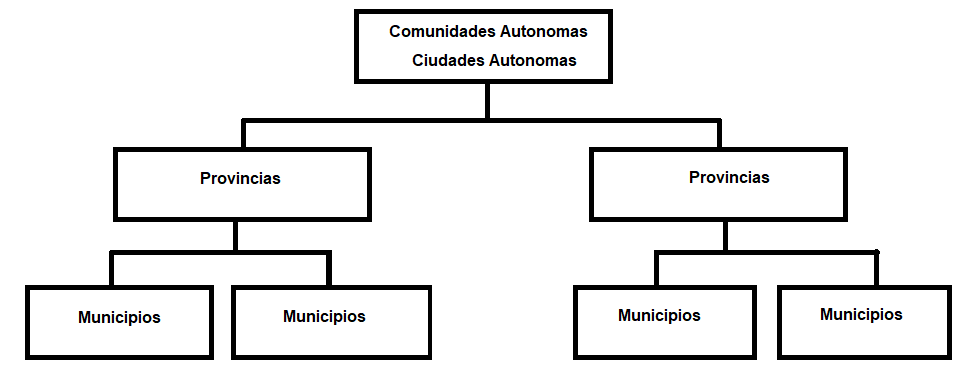

Thus, since we have already obtained the list of communities and autonomous cities, in the form of a dataframe, we should obtain the list of provinces by communities and that of municipalities by provinces. As these are available in HTML tables, let's get them the same way we got them from autonomous communities and cities.

The one for provinces by autonomous communities is on the website: 

                        https://www.ine.es/daco/daco42/codmun/cod_ccaa_provincia.htm

The municipalities by provinces can be found on the website:

                        https://www.ine.es/daco/daco42/codmun/22codmun.xlsx
                        
- Note: I left the links disabled because it downloads directly from an xlsx file (excel)

So, let's create two dataframes for these two files, the first being, in the same way as the previous file and the second using the xlsx file. Be aware of the data types of these tables, especially the columns referring to codes, as some are not of type numeric, that is, integers. For that, it was necessary to change to an integer type to be able to use it in the comparisons related to **if** :


In [ ]:
url1_estatica="https://www.ine.es/daco/daco42/codmun/cod_ccaa_provincia.htm"

pagina1 = requests.get(url1_estatica)
soup = BeautifulSoup(pagina1.text, 'html5lib')

dfs11 = pd.read_html(pagina1.text)
df11 = dfs11[0]
df11 = df11.dropna()
df11 = df11.astype({'CODAUTO':int,'CPRO':int})
df11.head(5)

Thus, since we have already obtained the list of communities and autonomous cities, in the form of a dataframe, we should obtain the list of provinces by communities and that of municipalities by provinces. As these are available in HTML tables, let's get them the same way we got them from autonomous communities and cities.

The one for provinces by autonomous communities is on the website: https://www.ine.es/daco/daco42/codmun/cod_ccaa_provincia.htm

Within the Top-Down view, we will apply **groupby** with **size()** to create a dataframe from which we will see a first graph on **Quantidade de Províncias pelas 19 Comunidades Autônomas/ilhas**.

Then we will draw up a graph showing "**Quantidade de Municípios pelas 19 Comunidades Autônomas/ilhas**".
And, finally, we are going to draw up a graph showing "**Quantidade de Municípios pelas 50 Províncias**".

We will also apply **sort_values()** to sort these reported quantities in descending order. And let's export as csv for future uses:

In [ ]:
dfs111 = df11.groupby(['Comunidad Autónoma']).size().reset_index(name='Quant Provincias')
print('Total de Províncias :',dfs111.sum())
dfs111.sort_values(by=['Quant Provincias'],inplace=True,ascending=False)
dfs111.to_csv('dfs111.csv',index=False)
dfs111.head()

In [ ]:
ax = dfs111.plot.bar(x='Comunidad Autónoma',rot=90, figsize= (18,10),fontsize=15,title=
                     "Quantidade de Províncias x Comunidade Autônoma ")

Recapitulating, we created the **df1** generated from the INE data download (raw data) and which has the following format:
                                        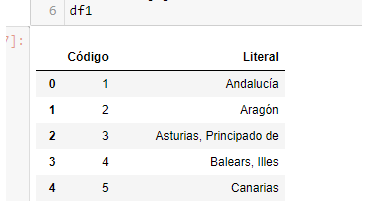
                                        
Next, we created the **df11** generated from the download of INE data, which shows the association of autonomous communities with the provinces, , and which has the following format:
                                       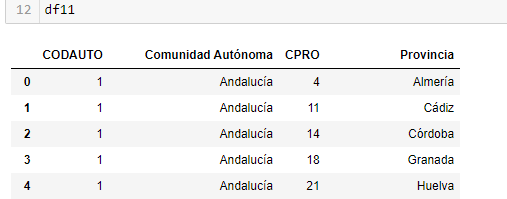
                                       
Then we created the **dfs111** generated from **df11**, associating the quantities of provinces in the autonomous communities, and ordering them in ascending order and serving to present the graph of __quantidade de províncias X comunidades autônomas__   , presenting the following format :
                                        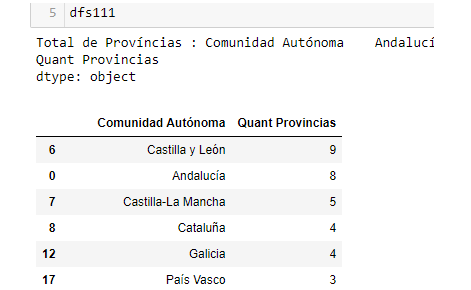


We are now going to act on the **quantidade de municípios por províncias**. For this, we are going to download the data that list the municipalities, in the **dfs12** dataframe and make a first adaptation to inform which province they, the municipalities, are associated with. Let's create columns in **dfs12** to fill in the names of the autonomous communities and provinces, which are just their codes.

In [ ]:
url2_estatica="https://www.ine.es/daco/daco42/codmun/diccionario22.xlsx"
# usei header=None para excluir um header vindo do excel e usei o skiprows[0] para excluir a primeira linha
dfs12 = pd.read_excel(url2_estatica, header=None,skiprows=[0]) 
dfs12 = dfs12.iloc[1:,:]
dfs12 = dfs12.rename(columns={0:'CODAUTO',1:'CPRO',2:'CMUN',3:'DC',4:'NOMBRE'})

dfs12 = dfs12.astype({'CODAUTO':int,'CPRO':int,'CMUN':int,'DC':int}, copy=False)
dfs12["COMAUT"]=""
dfs12["PROVINCIA"]=""
dfs12.rename(columns={'NOMBRE':'MUNICIPIO'}, inplace = True)
dfs12.reset_index()
dfs12.head()

As mentioned above, in the **dfs12** dataframe, two columns were created to contain the name of the Autonomous Communities and Provinces, as the Municipalities were already there. The following logic was made in order to __fill these two columns__ in the **dfs12** itself:

Note: It is a bit long process as can be seen in the extract of the following figure program that shows "program running" (Programa em execução) and "no program running" (Nenhum programa em execução) :
                                    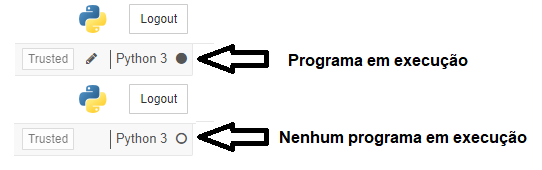
                                    
It is explained to deal with a change in a dataframe with 8131 rows X 7 columns.


In [ ]:

j=0
for i in df1.index:
    f1 = df1.iloc[j][0]
    f2 = df1.iloc[j][1]
    # print(f1)
    # print(f2)
    l = 0
    for k in dfs12.index:
        f3 = dfs12.iloc[l][0]
        if f3 == f1:
            dfs12.at[l,"COMAUT"] = f2
        l = l + 1
    j = j + 1
m = 0
for p in df11.index:
    f5 = df11.iloc[m][2]
    f6 = df11.iloc[m][3]
    n = 0
    for q in dfs12.index:
        f7 = dfs12.iloc[n][1]
        if f7 == f5:
            dfs12.at[n,"PROVINCIA"] = f6
        n = n + 1
    m = m + 1
dfs12.head(4)

In the following code, **dfs122** will be created, which will extract the columns containing the names of the autonomous communities and provinces. The municipalities were already:

In [ ]:
dfs122 = dfs12[['CODAUTO','COMAUT','CPRO','PROVINCIA','CMUN','MUNICIPIO']]
dfs122.to_csv('dfs122.csv',index=False)
dfs122.head(3)


About **dfs122** we will perform **groupby() by Autonomous Community**, to make the proper grouping of Autonomous Communities with Municipalities, **size()**, to total the number of municipalities by communities, **sort()**, to make a descending order of the quantities and **drop()**, to delete the line of index "zero" that does not refer to any item. In this way, we extract information related to **8131** municipalities. This result will be directed to the dataframe **dfs122a** and then exported as csv to the local file **dfs122a.csv**:

In [ ]:
dfs122a = dfs122.groupby(['COMAUT']).size().reset_index(name='QUANT MUNICÍPIOS')
dfs122a.sort_values(by=['QUANT MUNICÍPIOS'],inplace=True,ascending=False)
dfs122a.drop([0],inplace=True)
print('Total de Municipios :',dfs122a.sum())
dfs122a.to_csv('dfs122a.csv',index=False)
dfs122a.head(3)

In [ ]:
ax = dfs122a.plot.bar(x='COMAUT',rot=90, figsize= (16,10),fontsize=15,title=
                     "Quantidade de Municípios x Comunidade Autônoma ")

Let's now draw up the graph "Quantidade de municípios por Províncias". To do so, let's create a **dfs122b** dataframe that will be a **groupby() by provinces** to make the proper grouping of Provinces with Municipalities, **size()**, to total the number of municipalities by provinces , **sort()**, to make a descending order of the quantities and **drop()**, to delete the line of index "zero" that does not refer to any item.

In this way, we extract information related to **8131** municipalities. This result will be directed to the dataframe **dfs122b** and then exported as csv to the local file **dfs122b.csv**:

In [ ]:
dfs122b = dfs122.groupby(['PROVINCIA']).size().reset_index(name='QUANT MUNICÍPIOS')
dfs122b.sort_values(by=['QUANT MUNICÍPIOS'],inplace=True,ascending=False)
dfs122b.to_csv('dfs122b.csv',index=False)
dfs122b.head(5)

In [ ]:
ax = dfs122b.plot.bar(x='PROVINCIA',rot=90, figsize= (20,10),fontsize=15,title=
                     "Quantidade de Municípios x Provincias")

For didactic purposes, below is the use of SQL to extract information on the number of municipalities, by autonomous communities, such as, for example, Castilla y León, which has 2248 municipalities:

In [ ]:
import pandas as pd
from pandasql import sqldf
from sklearn import datasets
pysqldf = lambda q: sqldf(q, globals())
query = "SELECT COMAUT,count(COMAUT) FROM dfs122 WHERE COMAUT = 'Castilla y León';"

pysqldf(query)
    

## Task 3:

Defining the INE files to be downloaded to verify the <u>demographic evolution of Spain as a whole</u> and highlighting data such as the general total, total Spaniards and total immigrants.

After defining these files, define the data extraction/debugging methodology, and, next, prepare the analytical graphs.

The first information, which refers to Spain national data, will be extracted from the website:

                        https://www.ine.es/consul/serie.do?d=true&s=CP335&c=2&,

and which has the following format in HTML page:
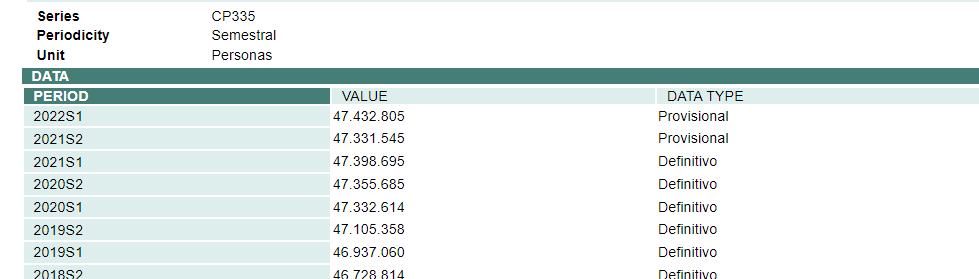




In [ ]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd
import locale
from locale import atof


url_estatica31 = "https://www.ine.es/consul/serie.do?d=true&s=CP335&c=2&"

pagina31 = requests.get(url_estatica31)
soup31 = BeautifulSoup(pagina31.text, 'html5lib')

dfs31 = pd.read_html(pagina31.text)

df31 = dfs31[0]
df31.head()


As can be seen, the data contained in __dfs31__ were extracted from an HTML page and the result is a __dfs31__ list with one element, which is verified through __len(dfs31)__. Thus, to access as a dataframe, just designate __dfs31[0]__, to another variable __df31__, which will be a Dataframe.

Next, as you can see in __df31__, the columns of interest are named __PERIODO__ and __VALOR__. So let's create a new dataframe, __df311__, with these two columns, and then we'll create a __dfs312__ dataframe, with an inversion of the order of the years, from 2015 to 2022.

Next, let's create another dataframe, __dfs313__, which will have 15 rows (from 0 to 14) and 2 columns, with the indexes reset and the values ​​divided by '1000000', to simplify the graphical display. Could there be a simpler and more direct way? Yes, but it would lose the pedagogical role of what is being developed, to identify the obstacles that arise and how to overcome them.

This whole task is part of debugging the data, so you can work more objectively.

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

df311=df31[['PERIODO','VALOR']]
df311['VALOR'] = (df311['VALOR'].replace('\.','',regex=True).astype(float))

df312 = df311[::-1]
df312.reset_index(inplace=True)
df313=df312[['PERIODO','VALOR']]
df313['VALOR'] = df313['VALOR']. div(1000000). round(2)
df313.head()

In [ ]:
df311.info()

And so, based on __df313__, a __plot.line()__ is elaborated, which shows the demographic evolution of Spain, from 2015 to 2022.

In [ ]:
import matplotlib.pyplot as plt

ax = df313.plot.line(x='PERIODO',y='VALOR',rot=0,grid=True ,legend = True, fontsize=15,title=
                     "Evolução Demográfica Espanha (2015-2022), valores em Milhões",
                    yticks=[46.0,46.25,46.50,46.75,47.0,47.25,47.50,47.75,48.0],figsize= (16,8))

From the table and graph shown above, it can be seen that in the period from 2015 to 2022, the demographic evolution was from **46,449,565**, in **2015**, to **47,432,805**, in **2022**, denoting a growth in the period of **2.117%**. It is worth noting that this total of **47,432,805** includes the native spanish people, foreign immigrants and both sexes.

Taken from the website:

                    https://geo.dieese.org.br/suprof/indicadores/indicador_02.php
                    
, the following text is displayed in the figure in portuguese, explaining the topic of Growth Rate (Taxa de Crescimento):
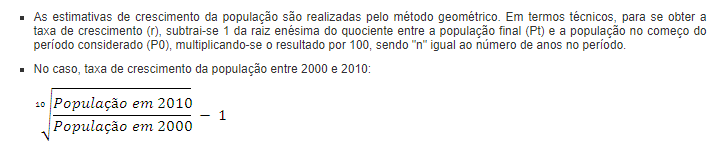
Thus, the annual growth rate of the exposed in the period shown in Spain is approximately **0.299%**, as calculated below, using the **math** library, and remembering that the period is from 2015 to 2022, or be 7 years.

In [ ]:
import math
result = ((math.pow(47.43/46.45,1/7) - 1)*100)
result1=round(result,3)
print("Taxa anual: ",result1)

As Spain is part of the "European Community", some codes are used to characterize the countries that belong to "**European Union**" - "**EU**. They are:
- **UE15**: Comprises the following list of countries: Germany, Austria, Belgium, Denmark, Spain, Finland, France, Greece, Ireland, Italy, Luxembourg, Netherlands, Portugal, United Kingdom and Sweden.
- **EU25**: Comprises the EU-15 countries plus Cyprus, Slovakia, Slovenia, Estonia, Hungary, Latvia, Lithuania, Malta, Poland and the Czech Republic.
- **UE27_2007**: Comprises the EU-25 countries, plus Bulgaria and Romania.
- **UE27_2020**: It comprises the EU28 countries without the United Kingdom (by virtue of BREXIT).
- **EU28**: Comprises the EU-25 countries plus Bulgaria, Romania and Croatia.

For the purpose of studying the demographics of Spain in more detail, we will consider the use of data from the following website:

                        https://www.ine.es/jaxiT3/files/t/es/xlsx/9676.xlsx?nocab=1

In this analysis I did not take these aspects of the European Community into account, but it is worth highlighting. Let's extract all the raw data from the excel spreadsheet on that site.

As can be seen, these data take a certain amount of time to be downloaded, indicating the need to download them in advance and store them locally for analysis:


In [ ]:
url20_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/9676.xlsx?nocab=1"
# usei header=None para excluir um header vindo do excel e usei o skiprows[0] para excluir a primeira linha
# dfs12 = pd.read_excel(url20_estatica, header=None,skiprows=[0])
dfs201 = pd.read_excel(url20_estatica,header=None,skiprows=[0,1,2,3,4,5,7,8,9])
dfs201.head(5)

In [ ]:
len(dfs201)

As can be seen, the dataframe **dfs201** was created with **46930 rows** and with a header of columns numbered from 0 to 41, and the first row, with the dates that should be considered the columns. In addition, the dates are in a long format. In the following code, we will solve these two points, that is, eliminate the header with index numbers and change the date format to **MM/YYYY**. It is important to note that as the dates are in Spanish, __set.locale()__ must be set, for the due recognition of the dates.

In [ ]:
import locale
from datetime import datetime as dt
locale.setlocale(locale.LC_TIME, 'es_ES')
# o 'for' está sendo utilizado para alterar o formato das datas constantes nas labels das colunas
# alterando, por exemplo, de 1 de enero de 2022 para 01/2022
for i in dfs201.columns:
    if i > 0:
        dd = dfs201.loc[0,i]
        datetime_object = dt.strptime(dd,'%d de %B de %Y')
        gg = datetime_object.strftime("%m/%Y")
        dfs201.loc[0,i]=gg
dfs201.columns = dfs201.iloc[0]
dfs201.drop([0], axis=0, inplace = True)
dfs201.head(5)

After this first movement of the raw data, and making some adjustments/cleaning of data in a first version of the dataframe, it becomes necessary to analyze the data to verify the way of presentation. Thus, it is worth explaining the first data to be worked on. The **dfs201** dataframe presents data on the demographic evolution of all of Spain, including both sexes and foreigners, which are basically separated between **UE** countries and the rest of the world. of indices from **1** to **12**. This identification was possible after analyzing the data and thus selecting them by the **head(12)** method. The columns, in a total of 40, show data from **01/2002** to **01/2022**, that is, a total of 20 years, but, of course, with two information per year, which totals the **40** :

In [ ]:
dfs201.head(12)

The above data is selected in the first **12** rows of interest, but it contains many cells with empty values. So, let's create a dataframe, **dfs201a**, limited to 12 lines and filling the **empty fields** with "__zero__".

In [ ]:
dfs201a=dfs201.head(12)
dfs201a.replace(' ',0,inplace = True)
dfs201a.head(4)

Based on the Dataframe **dfs201a**, which was limited to 12 rows but still with 40 columns, let's reduce the number of columns to 21 (date columns). Basically the columns contain January and July dates. Let's remove July, applying the __even__ and __odd__ index concept. In this case, we will be removing the <u>odd</u> using the **module %** operator.

In [ ]:
a = []
for i in range(len(dfs201a.columns)):
    if i != 0 and i % 2 == 0:
        a.append(i)
dfs201a.drop(dfs201a.columns[a], axis=1, inplace=True)
dfs201a.head(4)

We then have, as seen above, the **dfs201a** now with **12 rows and 22 columns**. The next step is to reverse the order of the years. The order is currently descending from 2022 to 2002. Let's use **dfs201a.iloc[:, ::-1]** to change the order from 2002 to 2022, that is, ascending, and assigning a new dataframe, **dfs201aa**.

In [102]:
dfs201aa = dfs201a.iloc[:, ::-1]
dfs201aa.head()

,01/2002,01/2003,01/2004,01/2005,01/2006,01/2007,01/2008,01/2009,01/2010,01/2011,...,01/2014,01/2015,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,01/2022,
1,41035271,41827836,42547454,43296335,44009969,44784659,45668938,46239271,46486621,46667175,...,46512199,46449565,46440099,46527039,46658447,46937060,47332614,47398695,47432805,Total
2,38701173,38843742,38999785,39189109,39371997,39584597,39790019,40013758,40206557,40384966,...,40553891,40558357,40521758,40502516,40459614,40398099,40335789,40183817,40066227,España
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1663834,1654838,UE27_2020 sin España
4,724019,893791,1066882,1284496,1500800,1738465,2039479,2116623,2114321,2112498,...,2027532,1981218,1956465,1943345,1925421,1938650,1967381,0,0,UE28 sin España
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,683076,692037,Europa menos UE27_2020


So we now have **dfs201aa** reduced to 12 rows, 22 columns and in ascending order. Now let's do a total of the numbers of immigrants. The rows __0__ and __1__, that is, the first two rows of **dfs201a** refer to the __total of people__ and the __total of Spanish people__. Rows __2__ to __11__ refer to __non-Spanish__. In order to filter these rows, as in many cases, a further index such as 12 must be applied. For example, in a list with elements from 0 to 4, we will have to select all of them with (0.5). So to apply this filter you must use **dfs201a[2:12]**

In [103]:
dfs201a[2:12]

,,01/2022,01/2021,01/2020,01/2019,01/2018,01/2017,01/2016,01/2015,01/2014,...,01/2011,01/2010,01/2009,01/2008,01/2007,01/2006,01/2005,01/2004,01/2003,01/2002
3,UE27_2020 sin España,1654838,1663834,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,UE28 sin España,0,0,1967381,1938650,1925421,1943345,1956465,1981218,2027532,...,2112498,2114321,2116623,2039479,1738465,1500800,1284496,1066882,893791,724019
5,Europa menos UE27_2020,692037,683076,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Europa menos UE28,0,0,360794,344723,329454,320125,310148,296820,287964,...,278474,274414,271259,260856,240805,221769,201662,176861,151760,120797
7,África,1184675,1151622,1120257,1047931,996516,979306,972249,972835,987674,...,1071376,1070992,1042687,961656,871211,801702,710884,613630,532169,442408
8,América del Norte,144137,136311,131395,121337,113249,107323,102659,97827,94796,...,87786,85737,83696,79596,74919,71412,67440,62268,56008,48736
9,Centro América y Caribe,645750,624455,587846,514760,459112,420900,396249,379107,366338,...,320919,304655,289116,258754,220878,193184,172595,153419,135126,115042
10,Sudamérica,2567083,2481287,2365093,2137202,1968448,1865106,1806220,1798192,1830843,...,2042094,2079521,2088317,1981303,1791520,1609835,1467373,1311400,1081197,780432
11,Asia,467217,463592,453709,424625,397462,379731,366138,357413,355693,...,362353,343684,327057,290617,255860,233201,197075,157860,128989,98034
12,Oceanía,10841,10701,10349,9732,9170,8686,8214,7796,7467,...,6709,6739,6758,6659,6403,6067,5700,5349,5053,4631


So let's do the sum of the 10 rows that represent non-Spanish people, but that requires some adjustments:
- The first is to force the numbers presented to be in a float format of up to two decimal places. That's why **pd.options.display.float_format = '{:.2f}'.format**
- The second is to make the sum that will be applied to the new line to be created and renamed to **total immigrants**.
- The third is to apply a reset to the indexes.
- The fourth is to associate a name **'TOTAL IMMIGRANTS'** in the column where the names of the rows appear.

And all this for the **dfs201b**

In [104]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
sums = dfs201a[2:12].select_dtypes(np.number).sum().rename('total imigrantes')
dfs201b = dfs201a[2:12].append(sums)
dfs201b.reset_index()
dfs201b.iloc[10,0]='TOTAL IMIGRANTES'
dfs201b.head(3)

,,01/2022,01/2021,01/2020,01/2019,01/2018,01/2017,01/2016,01/2015,01/2014,...,01/2011,01/2010,01/2009,01/2008,01/2007,01/2006,01/2005,01/2004,01/2003,01/2002
3,UE27_2020 sin España,1654838.00,1663834.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,UE28 sin España,0.00,0.00,1967381.00,1938650.00,1925421.00,1943345.00,1956465.00,1981218.00,2027532.00,...,2112498.00,2114321.00,2116623.00,2039479.00,1738465.00,1500800.00,1284496.00,1066882.00,893791.00,724019.00
5,Europa menos UE27_2020,692037.00,683076.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


After these totalization operations, it is necessary to reorder the columns in an ascending way, assigning them to **dfs201c**, as was done in **dfs201a** which resulted in **dfs201aa**. These dataframes, **dfs201aa**, and **dfs201c**, will be the two used to generate the three graphs, one of **general total of people, total of Spanish people and total of immigrants, adding the ones from the UE and the rest of the world**.

In [100]:
dfs201c = dfs201b.iloc[:, ::-1]
dfs201c.head(4)

,01/2002,01/2003,01/2004,01/2005,01/2006,01/2007,01/2008,01/2009,01/2010,01/2011,...,01/2014,01/2015,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,01/2022,
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1663834.00,1654838.00,UE27_2020 sin España
4,724019.00,893791.00,1066882.00,1284496.00,1500800.00,1738465.00,2039479.00,2116623.00,2114321.00,2112498.00,...,2027532.00,1981218.00,1956465.00,1943345.00,1925421.00,1938650.00,1967381.00,0.00,0.00,UE28 sin España
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,683076.00,692037.00,Europa menos UE27_2020
6,120797.00,151760.00,176861.00,201662.00,221769.00,240805.00,260856.00,271259.00,274414.00,278474.00,...,287964.00,296820.00,310148.00,320125.00,329454.00,344723.00,360794.00,0.00,0.00,Europa menos UE28


As observed so far, extracting data from the internet and preparing them for analysis consumes a reasonable amount of time in dealing with a topic focused on Data Science. Next, to prepare the graphs, we will also prepare the data. This preparation consists of reducing the value to be displayed in the chart. In place, for example, of the value of **4000000.00**, we will put it to a value of **40.00**, representing 40 M (Millions). After this preparation, we will prepare the three graphs. Next, we'll do what we've covered so far and create 3 lists, __l201aa, l202aa, and l201cc__, to be used in the charts.

In [105]:
l201a = dfs201aa.iloc[0,0:21].tolist()
l202a = dfs201aa.iloc[1,0:21].tolist()
l201c = dfs201c.iloc[10,0:21].tolist()
vlr=1000000
l201a[:] = [x / vlr for x in l201a]
l202a[:] = [x / vlr for x in l202a]
l201c[:] = [x / vlr for x in l201c]
l201aa = [round(num,2) for num in l201a]
l202aa = [round(num,2) for num in l202a]
l201cc = [round(num,2) for num in l201c]

In [106]:
l201c = dfs201c.iloc[10,0:10].tolist()
l201c

[2334099.0,
 2984093.0,
 3547669.0,
 4107225.0,
 4637970.0,
 5200061.0,
 5878920.0,
 6225513.0,
 6280063.0,
 6282209.0]

Let's generate 3 graphs:
- The first showing the three segments: The Grand Total, the Total Spaniards and the Total Immigrants, including the members of the __European Community__.
- The second highlighting the first two, namely: The General Total, the Total of native Spaniards.
- The third showing the total number of immigrants.

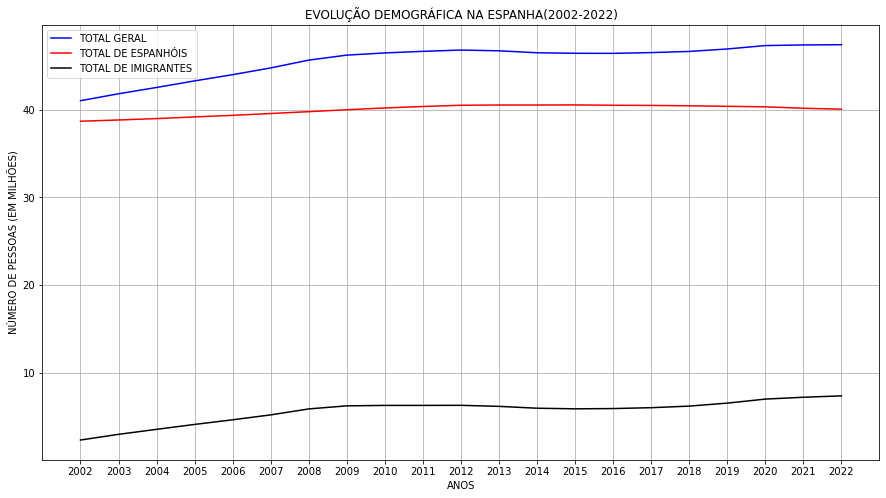

In [107]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.title("EVOLUÇÃO DEMOGRÁFICA NA ESPANHA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Definir valores dos dados
x = ['2002', '2003', '2004', '2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
     '2018','2019','2020','2021','2022']

y = l201aa
z = l202aa
w = l201cc

# Plotar os gráficos
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")
plt.plot(x,z,label = 'TOTAL DE ESPANHÓIS', color = "red")
plt.plot(x,w,label = 'TOTAL DE IMIGRANTES', color = "black")
plt.legend()
plt.grid()

# plt.yticks = ([5,10,15,20,25,30,35,40,45,50])

plt.show()

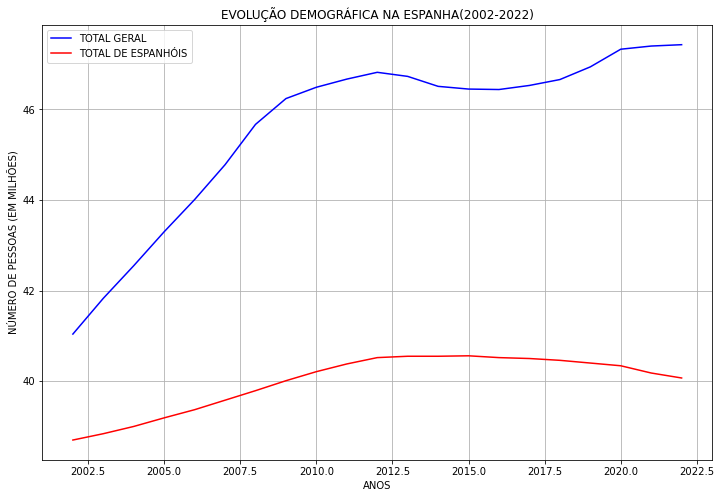

In [108]:
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.title("EVOLUÇÃO DEMOGRÁFICA NA ESPANHA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [2002, 2003, 2004, 2005, 2006, 2007,2008,2009,2010,2011,2012,2013, 2014, 2015, 2016, 2017,
     2018,2019,2020,2021,2022]

y = l201aa
z = l202aa


# Plota outra linha sobre o mesmo gráfico
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")
plt.plot(x,z,label = 'TOTAL DE ESPANHÓIS', color = "red")

plt.legend()
plt.grid()


plt.show()

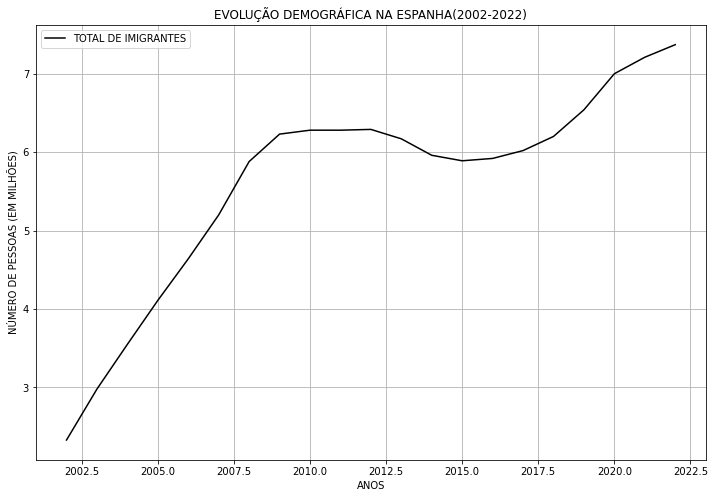

In [109]:

import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
plt.title("EVOLUÇÃO DEMOGRÁFICA NA ESPANHA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Define data values
x = [2002, 2003, 2004, 2005, 2006, 2007,2008,2009,2010,2011,2012,2013, 2014, 2015, 2016, 2017,
     2018,2019,2020,2021,2022]

w = l201cc

# Plota outra linha sobre o mesmo gráfico

plt.plot(x,w,label = 'TOTAL DE IMIGRANTES', color = "black")
plt.legend()
plt.grid()
plt.xticks = ([2002, 2004,2006,2008,2010,2012,2014, 2016,2018,2020,2022])


plt.show()

In a first analysis, considering the period from 2002 to 2022, the graphs above show:
- The Grand Total is above 40 million and below 50 million.
- Total Spaniards are stable around 40 million.
- The total number of immigrants is between 1 million in 2002 and close to 8 million in 2022.
- The Grand Total shows an evolution that was leveraged by immigrants.
- The Total Spaniards were stable, denoting a very timid evolution, and showing a decrease from 2015 onwards.
- The total number of immigrants shows a marked evolution.

Let's calculate some annual evolution rates, considering the period from __2002 to 2022__, of the mentioned segments:

In [111]:
import math
result = ((math.pow(l201aa[20]/l201aa[0],1/20) - 1)*100)
result_a = ((math.pow(l202aa[20]/l202aa[0],1/20) - 1)*100)
result_b = ((math.pow(l201cc[20]/l201cc[0],1/20) - 1)*100)
result1=round(result,3)
result2=round(result_a,3)
result3=round(result_b,3)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL(%)                   : ",result1)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE ESPANHÓIS(%)      : ",result2)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL IMIGRANTES(%)         : ",result3)

TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL(%)                   :  0.726
TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE ESPANHÓIS(%)      :  0.174
TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL IMIGRANTES(%)         :  5.927


Observing the above result, the general rate of demographic change is 0.726%, the __rate of evolution of Spaniards__ is __0.174%__ and the __rate of evolution of immigrants__ is __5,927%__. One conclusion that can be drawn is that the __evolution rate of the Spaniards__ was very low, with periods between __2015 and 2022__ which was __negative__. Another conclusion is that the __rate of immigrants__ had an important growth that was almost responsible for keeping the __general rate__emes of __0.726% per year__. For comparison purposes, the annual population growth rate of the world's population is shown in the following graph and taken from the World Bank website (https://data.worldbank.org) (https://data.worldbank.org) ) __0.9%__.

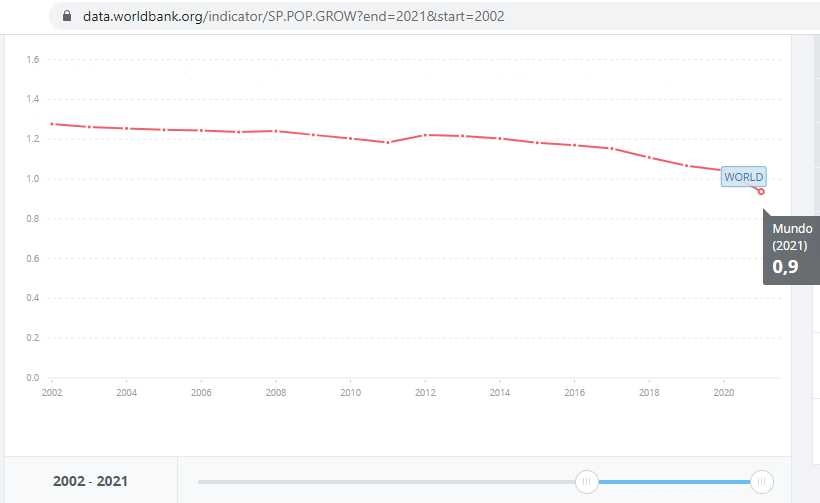

And the rate in Spain, with reference to the year 2021, is __-0.1%__, that is, it was negative. For the purpose of understanding, the World Bank data considers the following about said rate:
- <i>The annual population growth rate for year t is the exponential population growth rate in the middle of the year from year t-1 to year t, expressed as a percentage. Population is based on the de facto definition of population, which counts all residents regardless of legal status or citizenship</i>.

Thus, it is understood that the period considered by the World Bank is __2020__ to __2021__. Below, using the same code as above but adjusting for the period, I obtain the rate for the period from __2020__ to __2021__ and a positive rate of __0 is seen .148%__, referring to the grand total. In a certain way, it can be seen that the entry of immigrants causes an increase in the rate, in a way that causes a certain balance in the general indicator of the country. But it doesn't match the calculated __0.148%__.


In [112]:
import math
result = ((math.pow(l201aa[19]/l201aa[18],1/1) - 1)*100)
result_a = ((math.pow(l202aa[19]/l202aa[18],1/1) - 1)*100)
result_b = ((math.pow(l201cc[19]/l201cc[18],1/1) - 1)*100)
result1=round(result,3)
result2=round(result_a,3)
result3=round(result_b,3)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL(%)                   : ",result1)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE ESPANHÓIS(%)      : ",result2)
print("TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE IMIGRANTES(%)     : ",result3)

TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL(%)                   :  0.148
TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE ESPANHÓIS(%)      :  -0.397
TAXA GERAL ANUAL DE CRESCIMENTO POPULACIONAL DE IMIGRANTES(%)     :  3.0


The World Bank used midyear data. Therefore, trying to obtain this data, that is, data from 7/2020 and 7/2021, which were eliminated for the preparation of the graphs. This data is in the **dfs201** dataframe, shown below:

In [113]:
dfs201.head(3)

,,01/2022,07/2021,01/2021,07/2020,01/2020,07/2019,01/2019,07/2018,01/2018,...,07/2006,01/2006,07/2005,01/2005,07/2004,01/2004,07/2003,01/2003,07/2002,01/2002
1,Total,47432805,47331545,47398695,47355685,47332614,47105358,46937060,46728814,46658447,...,44360521,44009969,43662613,43296335,42859172,42547454,42196231,41827836,41423520,41035271
2,España,40066227,40108851,40183817,40235621,40335789,40353657,40398099,40407089,40459614,...,39470593,39371997,39257142,39189109,39084542,38999785,38913878,38843742,38755143,38701173
3,UE27_2020 sin España,1654838,1650054,1663834,1661407,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Based on **dfs201**, let's find the two values, one being 7/2020 and the other being 7/2021. These values are captured by the **iloc()** method and they are:

- dfs201.iloc[0.4]: 47355685 (from 7/2020)
- dfs201.iloc[0.2]: 47331545 (from 7/2021)

Applying it to the code widely used around here, we get a value of **-0.051**. However, the value presented in the World Bank is **-0.1**, which has <u>only one decimal place</u>. When changing in the code, the **round(result,3)** to **round(result,1)**, the value becomes **-0,1** coinciding with the World Bank. Let's print the two values in the code below, "as we wanted to demonstrate":

In [114]:
import math
result = ((math.pow(dfs201.iloc[0,2]/dfs201.iloc[0,4],1/1) - 1)*100)

result1=round(result,3)
result2=round(result,1)

print("TAXA  ANUAL (7/2020-7/2021) DE CRESCIMENTO POPULACIONAL(%) CONSIDERANDO 3 CASAS DECIMAIS: ",result1)
print("TAXA  ANUAL (7/2020-7/2021) DE CRESCIMENTO POPULACIONAL(%) CONSIDERANDO 1 CASA DECIMAL  : ",result2)

TAXA  ANUAL (7/2020-7/2021) DE CRESCIMENTO POPULACIONAL(%) CONSIDERANDO 3 CASAS DECIMAIS:  -0.051
TAXA  ANUAL (7/2020-7/2021) DE CRESCIMENTO POPULACIONAL(%) CONSIDERANDO 1 CASA DECIMAL  :  -0.1


So far, we have visualized the data without age range and without gender separation. Let's analyze these aspects, but using another data source from INE that is explained in the command below. The data separates by sex and age group and does not consider separations between Spaniards and immigrants.

In the same way as before, let's do a first debug of the data, eliminating some unnecessary columns, through the **skiprows()** method.
In addition we will use **lstrip()** to remove leading spaces from rows names.

As I have already mentioned, I am concerned with showing the solutions within a __pedagogical context__, which does not mean that it is the best solution.

In [115]:
url30_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/9674.xlsx?nocab=1"
# usei header=None para excluir um header vindo do excel e usei o skiprows[0,1,2,3,4,5,6,7,8] 
# para excluir as primeiras linhas
dfs40 = pd.read_excel(url30_estatica, header=None,skiprows=[0,1,2,3,4,5,7,8])
dfs40.iloc[:,0]=dfs40.iloc[:,0].str.lstrip()
dfs40.head(13)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,,1 de enero de 2022,1 de julio de 2021,1 de enero de 2021,1 de julio de 2020,1 de enero de 2020,1 de julio de 2019,1 de enero de 2019,1 de julio de 2018,1 de enero de 2018,...,1 de julio de 2006,1 de enero de 2006,1 de julio de 2005,1 de enero de 2005,1 de julio de 2004,1 de enero de 2004,1 de julio de 2003,1 de enero de 2003,1 de julio de 2002,1 de enero de 2002
1,Ambos sexos,47432805,47331545,47398695,47355685,47332614,47105358,46937060,46728814,46658447,...,44360521,44009969,43662613,43296335,42859172,42547454,42196231,41827836,41423520,41035271
2,Hombres,23236999,23191350,23227282,23208782,23199313,23091898,23009259,22911649,22881882,...,21900709,21719317,21541965,21335283,21093052,20924581,20737999,20542468,20326854,20115522
3,Mujeres,24195806,24140195,24171413,24146903,24133301,24013460,23927801,23817165,23776565,...,22459813,22290652,22120648,21961052,21766121,21622873,21458232,21285368,21096666,20919749
4,De 0 a 4 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ambos sexos,1845278,1874313,1926253,1970124,2011885,2035125,2067504,2081194,2106227,...,2287251,2253357,2213403,2183846,2139508,2108614,2064306,2020072,1974150,1938556
6,Hombres,948983,963698,989957,1012926,1034882,1046995,1064228,1071428,1084400,...,1176111,1157999,1137739,1122869,1099486,1082941,1060618,1037489,1013285,994873
7,Mujeres,896295,910615,936296,957198,977003,988131,1003275,1009766,1021827,...,1111140,1095358,1075664,1060977,1040022,1025673,1003688,982583,960865,943683
8,De 5 a 9 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ambos sexos,2253386,2268881,2294532,2312901,2330208,2341497,2356887,2387542,2423974,...,2074424,2039809,2007942,1979492,1957876,1938863,1929242,1917161,1912857,1910397


As we've done before, let's change the format of the dates using the code already applied, just changing the Dataframe **dfs40**:

In [116]:
import locale
from datetime import datetime as dt
locale.setlocale(locale.LC_TIME, 'es_ES')
# o for está sendo utilizado para alterar o formato das datas constantes nas labels das colunas
# alterando, por exemplo, de 1 de enero de 2022 para 01/2022
for i in dfs40.columns:
    if i > 0:
        dd = dfs40.loc[0,i]
        datetime_object = dt.strptime(dd,'%d de %B de %Y')
        gg = datetime_object.strftime("%m/%Y")
        dfs40.loc[0,i]=gg
dfs40.columns = dfs40.iloc[0]
dfs40.drop([0], axis=0, inplace = True)

dfs40.head()

,,01/2022,07/2021,01/2021,07/2020,01/2020,07/2019,01/2019,07/2018,01/2018,...,07/2006,01/2006,07/2005,01/2005,07/2004,01/2004,07/2003,01/2003,07/2002,01/2002
1,Ambos sexos,47432805,47331545,47398695,47355685,47332614,47105358,46937060,46728814,46658447,...,44360521,44009969,43662613,43296335,42859172,42547454,42196231,41827836,41423520,41035271
2,Hombres,23236999,23191350,23227282,23208782,23199313,23091898,23009259,22911649,22881882,...,21900709,21719317,21541965,21335283,21093052,20924581,20737999,20542468,20326854,20115522
3,Mujeres,24195806,24140195,24171413,24146903,24133301,24013460,23927801,23817165,23776565,...,22459813,22290652,22120648,21961052,21766121,21622873,21458232,21285368,21096666,20919749
4,De 0 a 4 años,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Ambos sexos,1845278,1874313,1926253,1970124,2011885,2035125,2067504,2081194,2106227,...,2287251,2253357,2213403,2183846,2139508,2108614,2064306,2020072,1974150,1938556


Now let's do two things, creating a new dataframe **dfs400**:
- One is to eliminate some periods of the year, and change the order of the years, in the same way as before.
- Another is to limit the view to the first three lines where the grand total and the totals by sex are shown.

In [117]:
dfs400 = dfs40.iloc[0:3,:]
a = []
for i in range(len(dfs400.columns)):
    if i != 0 and i % 2 == 0:
        a.append(i)
dfs400.drop(dfs400.columns[a], axis=1, inplace=True)
dfs400 = dfs400.iloc[:, ::-1]
dfs400.head()

,01/2002,01/2003,01/2004,01/2005,01/2006,01/2007,01/2008,01/2009,01/2010,01/2011,...,01/2014,01/2015,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,01/2022,
1,41035271,41827836,42547454,43296335,44009969,44784659,45668938,46239271,46486621,46667175,...,46512199,46449565,46440099,46527039,46658447,46937060,47332614,47398695,47432805,Ambos sexos
2,20115522,20542468,20924581,21335283,21719317,22118970,22591484,22880534,22982272,23049476,...,22877461,22826546,22807464,22834227,22881882,23009259,23199313,23227282,23236999,Hombres
3,20919749,21285368,21622873,21961052,22290652,22665689,23077454,23358736,23504349,23617698,...,23634738,23623019,23632635,23692812,23776565,23927801,24133301,24171413,24195806,Mujeres


Now we create the lists to be used in the charts and divide the values by 1000000.


In [118]:
l401 = dfs400.iloc[0,0:21].tolist()
l402 = dfs400.iloc[1,0:21].tolist()
l403 = dfs400.iloc[2,0:21].tolist()
vlr=1000000
l401[:] = [x / vlr for x in l401]
l402[:] = [x / vlr for x in l402]
l403[:] = [x / vlr for x in l403]
l401a = [round(num,2) for num in l401]
l402a = [round(num,2) for num in l402]
l403a = [round(num,2) for num in l403]

Two graphs are presented: one with the general total and the total by sex. And the other with the total by sex, given that they are within the same range, around 20 million, remembering that immigrants are included.

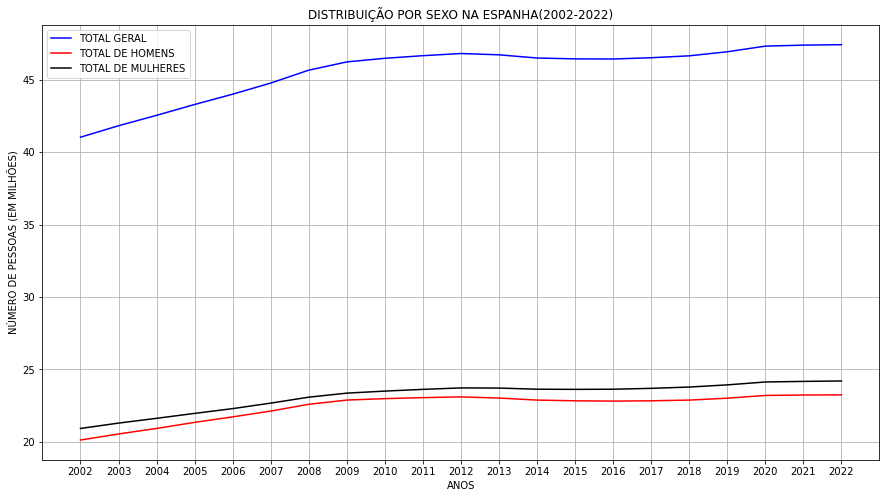

In [119]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.title("DISTRIBUIÇÃO POR SEXO NA ESPANHA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Definir valores dos dados
x = ['2002', '2003', '2004', '2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
     '2018','2019','2020','2021','2022']

y = l401a
z = l402a
w = l403a

# Plotar os gráficos
plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")
plt.plot(x,z,label = 'TOTAL DE HOMENS', color = "red")
plt.plot(x,w,label = 'TOTAL DE MULHERES', color = "black")
plt.legend()
plt.grid()

# plt.yticks = ([5,10,15,20,25,30,35,40,45,50])

plt.show()

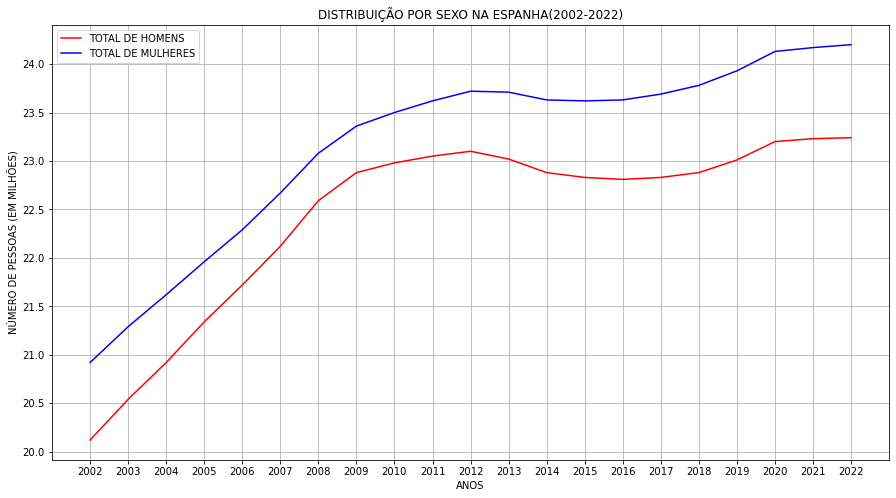

In [120]:
import numpy as np
import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.title("DISTRIBUIÇÃO POR SEXO NA ESPANHA(2002-2022)")
plt.xlabel("ANOS")
plt.ylabel("NÚMERO DE PESSOAS (EM MILHÕES)")

# Definir valores dos dados
x = ['2002', '2003', '2004', '2005', '2006', '2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
     '2018','2019','2020','2021','2022']

# y = l401a
z = l402a
w = l403a

# Plotar os gráficos
# plt.plot(x, y,label = 'TOTAL GERAL', color = "blue")
plt.plot(x,z,label = 'TOTAL DE HOMENS', color = "red")
plt.plot(x,w,label = 'TOTAL DE MULHERES', color = "blue")
plt.legend()
plt.grid()

# plt.yticks = ([5,10,15,20,25,30,35,40,45,50])

plt.show()

It is observed that the evolution of both sexes is **similar with the same curvature** and that the number of women is **always higher** than that of men, at least in the period from **2002** to **2022**.

Next, we will prepare data for the elaboration of two age pyramids. We will use **dfs40** as a base, which contains 5757 rows and 42 columns and we will extract two dataframes: **df410** and which generated **df411**, considering the use of data referring to __01/2022__ . And the **df420**, which generated the **df422**, considering the data referring to __01/2002__.
The objective is to compare the two pyramids.

In [121]:
# instruções dos dados de 01/2022
df410=dfs40.iloc[3:160,0:2]
df410.reset_index(drop=True, inplace=True)
df411 = df410.iloc[0:76,0:2]

# instruções dos dados de 01/2002.Vale destacar o uso de join para juntar dois dataframes, sendo um com o nome das linhas
# e outro com os dados.

df420=dfs40.iloc[3:160,41:42]
df420a=dfs40.iloc[3:160,0:1]
df421 =df420a.join(df420)
df421.reset_index(drop=True, inplace=True)
df422 = df421.iloc[0:76,0:2]

We will now elaborate the __Population Pyramids__ considering the sexes and the age ranges. For this topic, let's do the following steps:
- Create two lists to store the values of men and women.
- Create the dictionary **dict411** with the keys **Age**, with the values filled in with the age ranges, and **Hombres** and **Mujeres**, with empty lists.
- A **for** to extract the data of **Hombres** and **Mujeres** from **df411** and store in the created lists.
- Addition of these data in the created dictionary.

And then, the construction of the graph referring to **2022** and the graph referring to **2002**:

In [122]:
list1=[]
list2=[]

dict411 = {'Idade': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59',
                            '60-64','65-69','70-74','75-79','80-84','85-89','90+'],'Hombres':[],'Mujeres':[]}
for i in range(len(df411)):
    if df411.iloc[i,0]=='Mujeres':
         list1.append(df411.iloc[i,1])
    elif df411.iloc[i,0]=='Hombres':
         list2.append(0 - df411.iloc[i,1])
            
dict411['Mujeres'] = list1
dict411['Hombres'] = list2    
df411a=pd.DataFrame(dict411)   

[Text(0.5, 0, 'População (em milhões)'),
 Text(0, 0.5, 'Grupo-Idades'),
 Text(0.5, 1.0, 'Pirâmide Populacional da Espanha com dados de 01/2022\n Em Azul : Homens; Em Vermelho : Mulheres')]

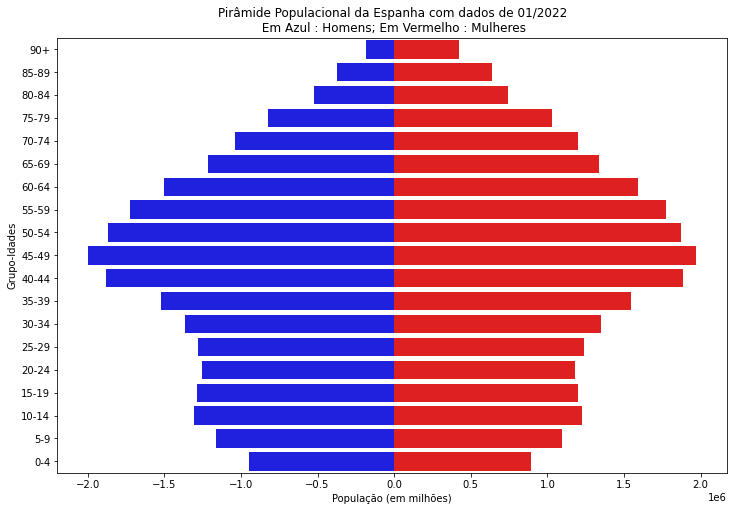

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)


AgeClass = ['90+','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49',
            '40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x='Hombres', y='Idade', data=df411a, order=AgeClass,lw=0 ,color = "blue")

bar_plot = sns.barplot(x='Mujeres', y='Idade', data=df411a, order=AgeClass,lw=0,color = "red" )

bar_plot.set(xlabel="População (em milhões)", ylabel="Grupo-Idades", 
             title = "Pirâmide Populacional da Espanha com dados de 01/2022\n Em Azul : Homens; Em Vermelho : Mulheres")

In [124]:
list3=[]
list4=[]

dict422 = {'Idade': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59',
                            '60-64','65-69','70-74','75-79','80-84','85-89','90+'],'Hombres':[],'Mujeres':[]}
for i in range(len(df422)):
    if df422.iloc[i,0]=='Mujeres':
         list3.append(df422.iloc[i,1])
    elif df422.iloc[i,0]=='Hombres':
         list4.append(0 - df422.iloc[i,1])
            
dict422['Mujeres'] = list3
dict422['Hombres'] = list4    
df422a=pd.DataFrame(dict422)   

[Text(0.5, 0, 'População (em milhões)'),
 Text(0, 0.5, 'Grupo-Idades'),
 Text(0.5, 1.0, 'Pirâmide Populacional da Espanha com dados de 01/2002\n Em Azul : Homens; Em Vermelho : Mulheres')]

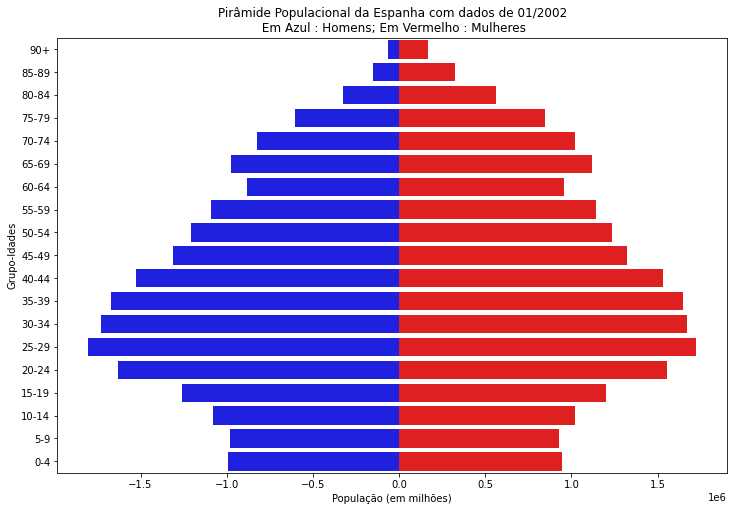

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)


AgeClass = ['90+','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49',
            '40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x='Hombres', y='Idade', data=df422a, order=AgeClass,lw=0 ,color = "blue")

bar_plot = sns.barplot(x='Mujeres', y='Idade', data=df422a, order=AgeClass,lw=0,color = "red" )

bar_plot.set(xlabel="População (em milhões)", ylabel="Grupo-Idades", 
             title = "Pirâmide Populacional da Espanha com dados de 01/2002\n Em Azul : Homens; Em Vermelho : Mulheres")


As you can see, the population pyramids or **age pyramids** have a:
- **Top**: representing the elderly population.
- **Body**: representing the adult population.
- **Base**: representing the young population.

Some considerations regarding both pyramids:

- The top of the 2022 pyramid, where the elderly are represented, is wider than that of 2002, denoting a high life expectancy, and, in other words, a low **mortality rate**.
- The base of the pyramid in 2022 is slightly lower than in 2002, showing stability with a slight downward trend in the **birth rate**.
- The 2022 pyramid body has a higher concentration in the 40-50 age group, while the 2002 pyramid has a greater concentration in the 20-40 age group. The body depicts the economically active population.

As a conclusion, the pyramids shown here, even considering immigrants, present the style of developed countries where a low birth rate is perceived, which represents a possible lack of labor, and a low mortality rate, which represents a necessary greater government effort with welfare expenditures.
Another concern of the government must be the incentives for immigration, basically aiming at labor and an increase in the birth rate.

Let's evolve a little more in understanding the pyramids. Let's get data from __1972__ to build an age pyramid and be able to compare with that of __2022__. The information is on the website:

                            https://www.ine.es/jaxiT3/files/t/es/xlsx/10256.xlsx?nocab=1


Next, we will prepare the data for the elaboration of the pyramid:

[Text(0.5, 0, 'População (em milhares)'),
 Text(0, 0.5, 'Idades de 0 a 84'),
 Text(0.5, 1.0, 'Pirâmide Populacional da Espanha com dados de 01/1972 (Em Azul : Homens; Em Vermelho : Mulheres)')]

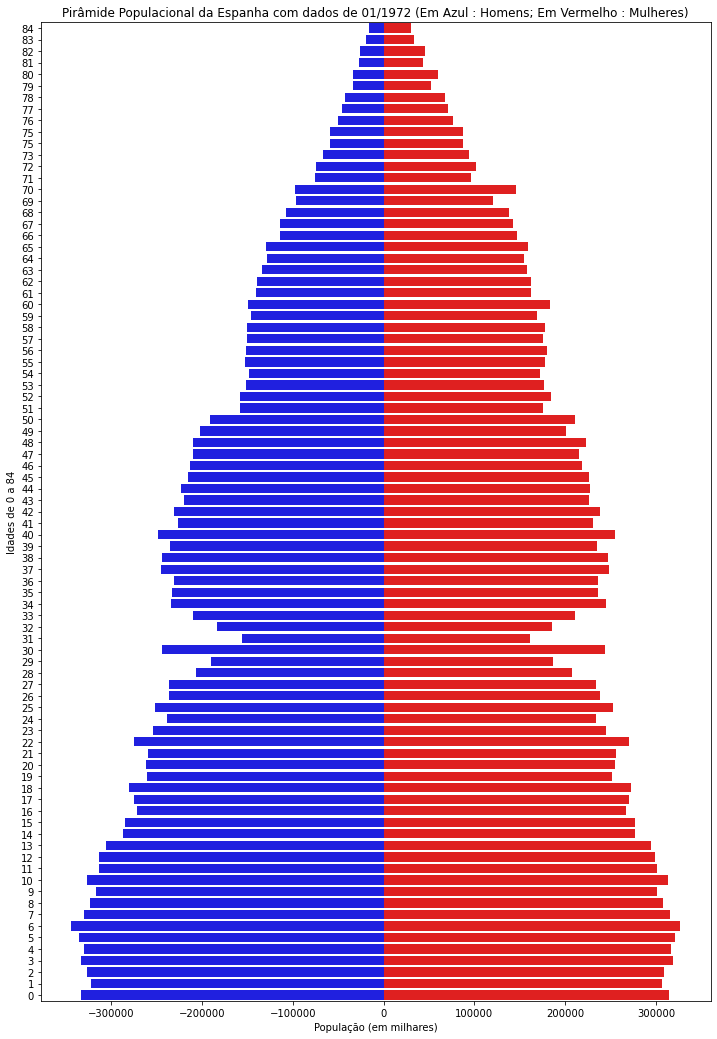

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import locale
from datetime import datetime as dt

# instruções para baixar os dados em xlsx
url50_estatica="https://www.ine.es/jaxiT3/files/t/es/xlsx/10256.xlsx?nocab=1"
dfs50 = pd.read_excel(url50_estatica, header=None,skiprows=[0,1,2,3,4,5])
dfs50.iloc[:,0]=dfs50.iloc[:,0].str.lstrip()

# instruções para alterar formato das datas

locale.setlocale(locale.LC_TIME, 'es_ES')
# o for está sendo utilizado para alterar o formato das datas constantes nas labels das colunas
# alterando, por exemplo, de 1 de enero de 2022 para 01/2022
for i in dfs50.columns:
    if i > 0:
        dd = dfs50.loc[0,i]
        datetime_object = dt.strptime(dd,'%d de %B de %Y')
        gg = datetime_object.strftime("%m/%Y")
        dfs50.loc[0,i]=gg
dfs50.columns = dfs50.iloc[0]
dfs50.drop([0], axis=0, inplace = True)
# a instrução a seguir vai selecionar os dados necessários de dfs50 considerando ano de 1971
df500=dfs50.iloc[1:436,:]
df500a=df500.iloc[:,0:1]
df500b=df500.iloc[:,103:104]
df501=df500a.join(df500b)
df501.reset_index(drop=True, inplace=True)
df502 = df501.iloc[3:343,0:2]
# a instrução a seguir prepara um dataframe df503 com os dados de homens e mulheres.
list5=[]
list6=[]
#a instrução a seguir elabora o gráfico
dict502 = {'Idade': ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
'21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40',
'41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60',
'61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80',
'81','82','83','84'],'Hombres':[],'Mujeres':[]}
for i in range(len(df502)):
    if df502.iloc[i,0]=='Mujeres':
         list5.append(df502.iloc[i,1])
    elif df502.iloc[i,0]=='Hombres':
         list6.append(0 - df502.iloc[i,1])

# instrução para o gráfico            

dict502['Mujeres'] = list5
dict502['Hombres'] = list6    
df503=pd.DataFrame(dict502) 


f = plt.figure()
f.set_figwidth(12)
f.set_figheight(18)


AgeClass = ['84','83','82','81','80','79','78','77','76','75','75','73','72','71','70','69','68','67','66','65','64',
           '63','62','61','60','59','58','57','56','55','54','53','52','51','50','49','48','47','46','45','44',
           '43','42','41','40','39','38','37','36','35','34','33','32','31','30','29','28','27','26','25','24',
           '23','22','21','20','19','18','17','16','15','14','13','12','11','10','9','8','7','6','5','4',
           '3','2','1','0']

bar_plot = sns.barplot(x='Hombres', y='Idade', data=df503, order=AgeClass,lw=0 ,color = "blue")

bar_plot = sns.barplot(x='Mujeres', y='Idade', data=df503, order=AgeClass,lw=0,color = "red" )

bar_plot.set(xlabel="População (em milhares)", ylabel="Idades de 0 a 84", 
             title = "Pirâmide Populacional da Espanha com dados de 01/1972 (Em Azul : Homens; Em Vermelho : Mulheres)")

Observing the pyramid generated with INE data for **1971**, it can be seen that they are designated by each year and not by a group of years. For the purpose of comparison with the other elaborate pyramids, a visual analysis would be somewhat difficult.

Therefore, I created a code that, based on the data, already worked on and which are portrayed in **df502**, would group together for a **5-year interval**, as it is in the other pyramids, adding the items related to **each year**.

The last age in 01/1971, which makes a difference of close to **50 years** for the current year, was 84 years old, but which makes it possible to compare the pyramids. The following instruction deals with the collection of the **df502** until the elaboration of the **df5021**, used for the elaboration of the graph.

[Text(0.5, 0, 'População (em milhões)'),
 Text(0, 0.5, 'Grupo-Idades'),
 Text(0.5, 1.0, 'Pirâmide Populacional da Espanha com dados de 01/1971\n Em Azul : Homens; Em Vermelho : Mulheres')]

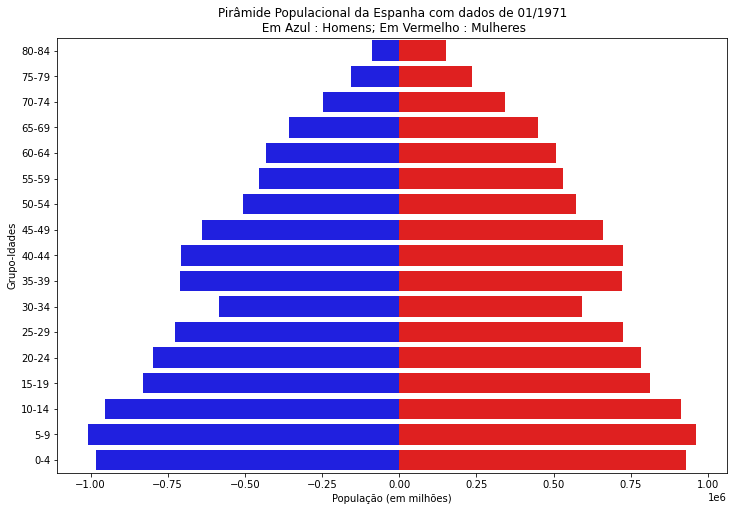

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


list31=[]
list41=[]


dict5021 = {'Idade': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59',
                            '60-64','65-69','70-74','75-79','80-84'],'Hombres':[],'Mujeres':[]}
for i in range(len(df502)):
    if df502.iloc[i,0]=='Mujeres':
        
        list31.append(df502.iloc[i,1])

    elif df502.iloc[i,0]=='Hombres':
        
        list41.append(df502.iloc[i,1])

# instruções para mulheres       
        
# valor da quantidade de loops

bb=int(len(list31)/5)

# lista para armazenar os números para serem somados em um total de 5.
listfg10=[]

# lista que irá mostrar o resultado final depois da soma de cada 5 anos
listfg1000=[]

# lista que será usada para armazenar a soma de cada grupo
list_a =[]       

# For para 'mulheres'

for z in range(bb):
    listfg10.append(list31[0])
    listfg10.append(list31[1])
    listfg10.append(list31[2])
    list_a = sum(listfg10)
    del list31[0:5]
    listfg1000.append(list_a)
    listfg10.clear()

    
# Intruções para homens

# valor da quantidade de loops

bb1=int(len(list41)/5)

# lista para armazenar os números para serem somados em um total de 5.
listfg11=[]

# lista que irá mostrar o resultado final depois da soma de cada 5 anos
listfg1100=[]

# lista que será usada para armazenar a soma de cada grupo
list_a1 =[]       

# For para 'homens'

for z in range(bb1):
    listfg11.append(list41[0])
    listfg11.append(list41[1])
    listfg11.append(list41[2])
    list_a1 = sum(listfg11)
    del list41[0:5]
    listfg1100.append(0 - list_a1)
    listfg11.clear()

    
dict5021['Mujeres'] = listfg1000
dict5021['Hombres'] = listfg1100  
df5021=pd.DataFrame(dict5021)  
#Elaboração do grafico

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)


AgeClass = ['80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49',
            '40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

bar_plot = sns.barplot(x='Hombres', y='Idade', data=df5021, order=AgeClass,lw=0 ,color = "blue")

bar_plot = sns.barplot(x='Mujeres', y='Idade', data=df5021, order=AgeClass,lw=0,color = "red" )

bar_plot.set(xlabel="População (em milhões)", ylabel="Grupo-Idades", 
             title = "Pirâmide Populacional da Espanha com dados de 01/1971\n Em Azul : Homens; Em Vermelho : Mulheres")


By taking a "picture" of the three pyramids and putting them together, it is possible to make some important observations:

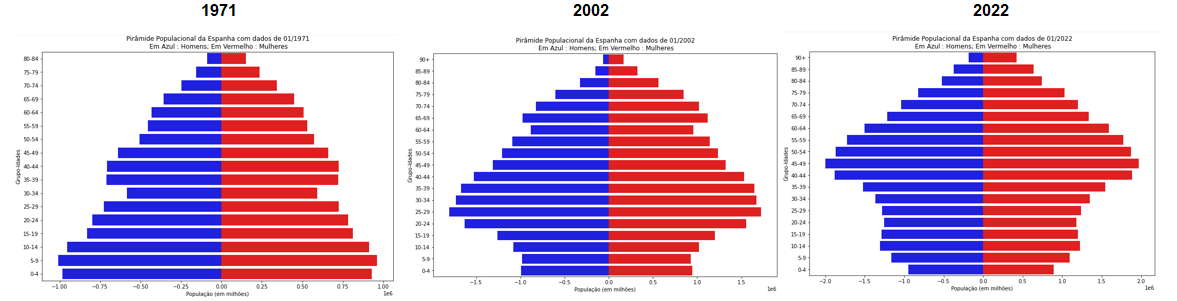

The __pyramid of 1971__ has a wider base, meaning an apparently high birth rate, a body with an emphasis on the 35-50 age range, and a narrow top, but in the over 80 age range, not yet meaning a high mortality rate.

The __pyramid of 2002__ has a narrower base meaning a declining birth rate compared to 1971, a body with emphasis on the 20-45 age group and a narrower top but for ages over 85 .

The __pyramid of 2022__ has a narrower base, compared to the previous ones, meaning a still declining birth rate, a body with an emphasis on the 40-60 age group and a less narrow top for ages over 85, meaning a lower mortality rate.

As a conclusion, I can say that the evolution of these pyramids meets the need for government policies to be focused on improving/maintaining access to basic conditions, such as health, education and qualified training for the job market, in addition to the encouraging immigration to increase the birth rate, in addition to the economically active population (body of the pyramid) aiming at a vision of the future.

See more about "Age Pyramids" at:

                            https://brasilescola.uol.com.br/geografia/piramides-etarias.htm

Let's now take a look at **Linear Regression**.

What is **Linear Regression**?

Linear regression models the relationships between at least one explanatory or independent variable and an outcome or dependent variable.

When there is **an independent variable**, the procedure is known as **Simple Linear Regression**. When there are more independent variables, statisticians refer to this as **Multiple Regression**.

In our case the **independent variable** is the **time** (in years) plotted on the **x-axis** and the **dependent variable** is the **population (in number of people)** located on the **y axis**.

This formatting has been used in the charts used so far. Let's start from the **dfs400** dataframe to create a dataframe in a more suitable format to build the chart, using the **Seaborn** library. This dataframe is **dfs4000**.

When drawing up the graph, it becomes interesting to observe the behavior by changing the value of **order**. For **order = 1**, the regression is presented as a straight line, for **order=2**, the regression is presented as a curve. With **order=3**, the regression is at its best and compared to the points.
Remembering that an __xy equation__ of order = 1 is a first degree equation, order = 2 is a second degree equation and order=3 is a third degree equation, or cubic equation. So order is the degree of the equation. The following figure summarizes this:
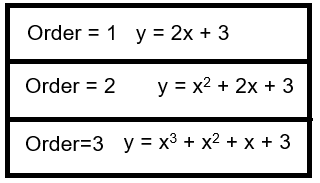

From the observation of the graphs, the most appropriate regression is the Polynomial:

In [131]:
dfs400.head(4)

,01/2002,01/2003,01/2004,01/2005,01/2006,01/2007,01/2008,01/2009,01/2010,01/2011,...,01/2014,01/2015,01/2016,01/2017,01/2018,01/2019,01/2020,01/2021,01/2022,
1,41035271,41827836,42547454,43296335,44009969,44784659,45668938,46239271,46486621,46667175,...,46512199,46449565,46440099,46527039,46658447,46937060,47332614,47398695,47432805,Ambos sexos
2,20115522,20542468,20924581,21335283,21719317,22118970,22591484,22880534,22982272,23049476,...,22877461,22826546,22807464,22834227,22881882,23009259,23199313,23227282,23236999,Hombres
3,20919749,21285368,21622873,21961052,22290652,22665689,23077454,23358736,23504349,23617698,...,23634738,23623019,23632635,23692812,23776565,23927801,24133301,24171413,24195806,Mujeres


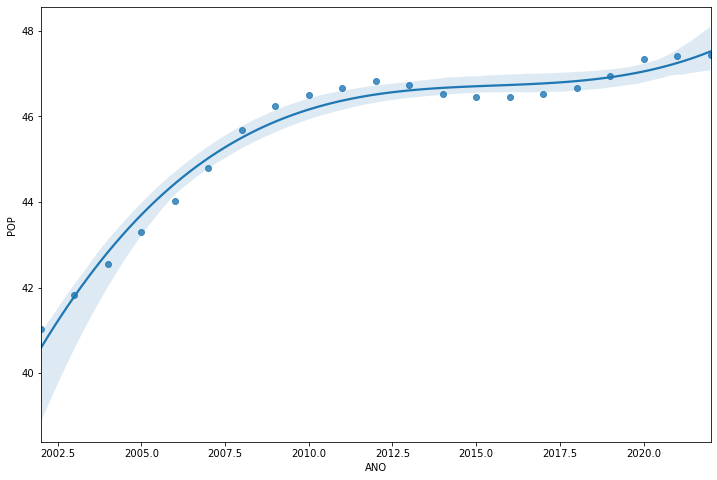

In [132]:
import math
import seaborn as sns
from scipy import stats
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)
# Esta será a lista com os anos
list30=[]
# Esta será a lista com a população de 2001 até 2022
list40=[]
list30=dfs400.columns.tolist()
list30.remove('')
ch = '01/'
list30 = [elem.replace(ch, '') for elem in list30]
# list30a=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
list30a = [eval(i) for i in list30]

for x in range(len(dfs400.iloc[0,0:21])):
    list40.append(int(dfs400.iloc[0,x]))
        
meuInt = 1000000
list41 = [x / meuInt for x in list40]


dict550={"ANO":list30a,"POP":list41}
dfs4000=pd.DataFrame(dict550)

dfs4000.reset_index(inplace=True)
inclinação, intercept, rvalue, pvalue, stderr = stats.linregress(dfs4000['ANO'],dfs4000['POP'])
ax=sns.regplot(x='ANO',y='POP',data=dfs4000, order=3)



In [134]:
dfs4000.head()

,index,ANO,POP
0,0,2002,41.04
1,1,2003,41.83
2,2,2004,42.55
3,3,2005,43.30
4,4,2006,44.01


In [133]:
import numpy as np
x = dfs4000['ANO']
y = dfs4000['POP']
# Aqui vamos usar a polinomial de terceiro grau(cubico) 
f = np.polyfit(x, y, 3)
print(f)
print('--------------------------------------------------------------')
p = np.poly1d(f)
print(p)

[ 2.29130876e-03 -1.38549092e+01  2.79256281e+04 -1.87620522e+07]
--------------------------------------------------------------
          3         2
0.002291 x - 13.85 x + 2.793e+04 x - 1.876e+07


So the polynomial function is:
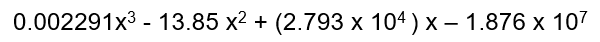

Therefore, from the figure in the graph, it can be observed that the **Third Order Polynomial Regression** fits more precisely to the population data from Spain.

## Conclusions:

In this jupyter notebook, I explored extracting HTML data as well as xlsx files, thus showing the versatility in obtaining data for analysis. I tried to present the preparation of the raw data for its use and, therefore, its outstanding importance.
I also tried to address specific themes, some demographic phenomena such as the Age Pyramid and the conclusions that can be drawn, such as population aging, low birth rates, among others. I also made a demo about Regression, which is a topic often discussed in Machine Learning issues.

And again, the development here was made observing pedagogical aspects and with due science that may not have been the best option, but the option that appeared.

In the next Jupyter Notebook we will work on INE data to verify the demographic evolution related to the Autonomous Communities, Provinces and Municipalities, in addition to proceeding with questions about Linear Regression.